In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('monthly-milk-production-pounds-p.csv')

In [33]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [34]:
df.columns = ['Month','Milk in pounds per cow']
df.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [35]:
df.tail()

,Month,Milk in pounds per cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [36]:
df.drop(168,axis=0,inplace=True)

In [37]:
df['Month'] = pd.to_datetime(df['Month'])

In [38]:
df.tail()

,Month,Milk in pounds per cow
163,1975-08-01,858.0
164,1975-09-01,817.0
165,1975-10-01,827.0
166,1975-11-01,797.0
167,1975-12-01,843.0


In [39]:
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

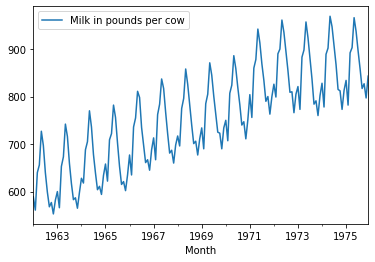

In [40]:
df.plot()

<ipython-input-41-c42d80700bec>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)


<Figure size 432x288 with 0 Axes>

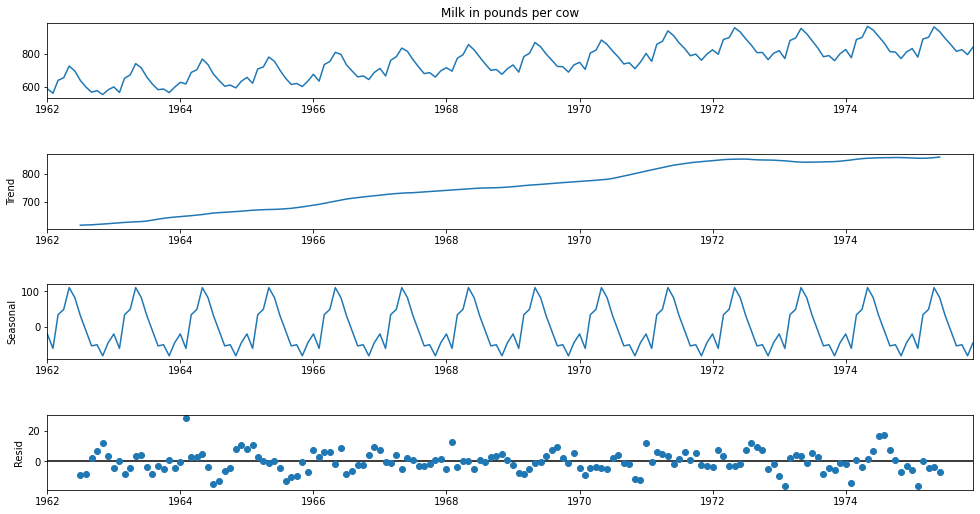

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [43]:
pred_col = 'Milk in pounds per cow'
df = df[[pred_col]]

In [46]:
year_reads = len(df['1975'])
year_reads

<ipython-input-46-7b28338a5350>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  year_reads = len(df['1975'])


12

In [62]:
forecast_out = year_reads*7 # predicting 7 years into future
df['Prediction'] = df[[pred_col]].shift(-forecast_out)

In [63]:
df.tail()

,Milk in pounds per cow,Prediction
Month,,
1975-08-01,858.0,NaN
1975-09-01,817.0,NaN
1975-10-01,827.0,NaN
1975-11-01,797.0,NaN
1975-12-01,843.0,NaN


In [64]:
X = np.array(df.drop('Prediction', 1))

In [65]:
X_forecast = X[-forecast_out:] 
y_forecast = np.array(df[pred_col])[-forecast_out:]
X = X[:-forecast_out] 

In [66]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [68]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.9009539013897998


In [69]:
forecast_prediction = clf.predict(X_forecast)

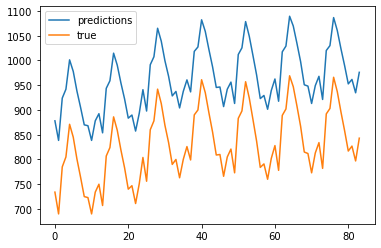

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(forecast_prediction, label='predictions');
plt.plot(y_forecast, label='true');
plt.legend()
plt.show();

In [78]:
def predict_ts(forecast_value):
    df['Prediction'] = df[[pred_col]].shift(-forecast_value)
    X = np.array(df.drop('Prediction', 1))
    X_forecast = X[-forecast_value:] 
    y_forecast = np.array(df[pred_col])[-forecast_value:]
    X = X[:-forecast_value] 
    y = np.array(df['Prediction'])
    y = y[:-forecast_value]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    clf = LinearRegression()
    clf.fit(X_train,y_train)
    confidence = clf.score(X_test, y_test)
    print("confidence: ", confidence)
    forecast_prediction = clf.predict(X_forecast)
    plt.plot(forecast_prediction, label='predictions');
    plt.plot(y_forecast, label='true');
    plt.legend()
    plt.show();

confidence:  0.9693910967448258


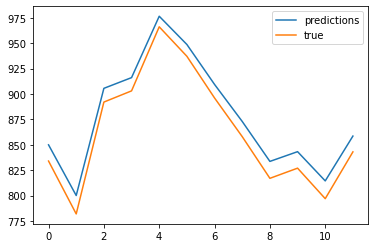

In [79]:
predict_ts(year_reads)

confidence:  0.8709296278052973


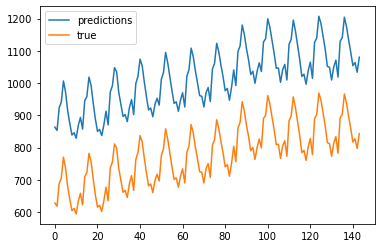

In [80]:
predict_ts(year_reads*12)